## Analyzing Global Education: Insights into Literacy, Enrollment, and Gender Disparities

### Problem Statement
The challenge is to analyze global education data to uncover patterns and insights about educational achievement, gender disparities, and access across countries. Identifying correlations between key education indicators and socio-economic factors could provide insights for policymakers and stakeholders to address educational inequalities and improve global educational outcomes.

### Objectives
- To explore global education trends using data visualization techniques.
- To analyze various factors in education, such as literacy rates, enrollment levels, proficiency in core subjects, and gender disparities.
- To assess correlations between educational metrics (e.g., proficiency levels and literacy rates) and social indicators (e.g., unemployment, out-of-school rates).

### **Step 1: Read the data**

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Read the dataset
data = pd.read_csv('Global_Education_updated.csv')

# Display the first few rows and basic information about the dataset
print("First few rows of the dataset:")
print(data.head())

print("\nDataset Information:")
data.info()

print("\nSummary statistics:")
print(data.describe())


First few rows of the dataset:
  Countries and areas  Latitude   Longitude  OOSR_Pre0Primary_Age_Male  \
0             Albania  41.153332  20.168331                          4   
1             Algeria  28.033886   1.659626                          0   
2             Andorra  42.506285   1.521801                          0   
3              Angola  11.202692  17.873887                         31   
4            Anguilla  18.220554  63.068615                         14   

   OOSR_Pre0Primary_Age_Female  OOSR_Primary_Age_Male  \
0                            2                      6   
1                            0                      0   
2                            0                      0   
3                           39                      0   
4                            0                      0   

   OOSR_Primary_Age_Female  OOSR_Lower_Secondary_Age_Male  \
0                        3                              6   
1                        0                              0  

### **Step 2: Clean the Data**

In [2]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Fill or drop missing values as necessary
data = data.dropna()  # Dropping rows with missing values
print("\nDataset shape after dropping missing values:", data.shape)

# Rename columns for easier access if required
data.rename(columns=lambda x: x.strip(), inplace=True)  # Strip any extra spaces from column names

# Ensure no duplicate rows exist
data = data.drop_duplicates()
print("\nDataset shape after removing duplicates:", data.shape)



Missing values in the dataset:
Countries and areas                        0
Latitude                                   0
Longitude                                  0
OOSR_Pre0Primary_Age_Male                  0
OOSR_Pre0Primary_Age_Female                0
OOSR_Primary_Age_Male                      0
OOSR_Primary_Age_Female                    0
OOSR_Lower_Secondary_Age_Male              0
OOSR_Lower_Secondary_Age_Female            0
OOSR_Upper_Secondary_Age_Male              0
OOSR_Upper_Secondary_Age_Female            0
Completion_Rate_Primary_Male               0
Completion_Rate_Primary_Female             0
Completion_Rate_Lower_Secondary_Male       0
Completion_Rate_Lower_Secondary_Female     0
Completion_Rate_Upper_Secondary_Male       0
Completion_Rate_Upper_Secondary_Female     0
Grade_2_3_Proficiency_Reading              0
Grade_2_3_Proficiency_Math                 0
Primary_End_Proficiency_Reading            0
Primary_End_Proficiency_Math               0
Lower_Secondary_End_Pro

### **Step 3: Visualization**

1. Scatter Plot with Linear Regression

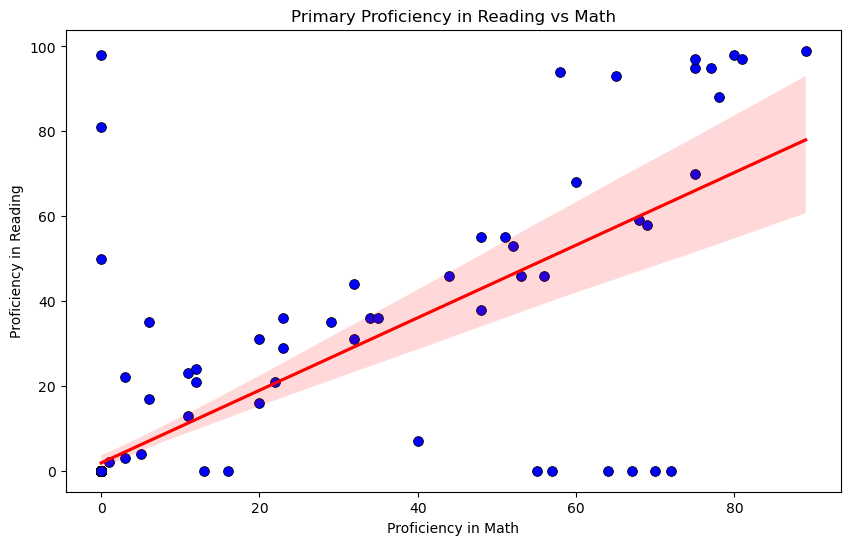

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with a linear regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Primary_End_Proficiency_Math",
    y="Primary_End_Proficiency_Reading",
    data=data,
    color="blue",
    edgecolor="black",
    s=50
)
sns.regplot(
    x="Primary_End_Proficiency_Math",
    y="Primary_End_Proficiency_Reading",
    data=data,
    scatter=False,
    color="red"
)
plt.title("Primary Proficiency in Reading vs Math")
plt.xlabel("Proficiency in Math")
plt.ylabel("Proficiency in Reading")
plt.show()


2. Bar Chart: Average Youth Literacy Rate by Gender python

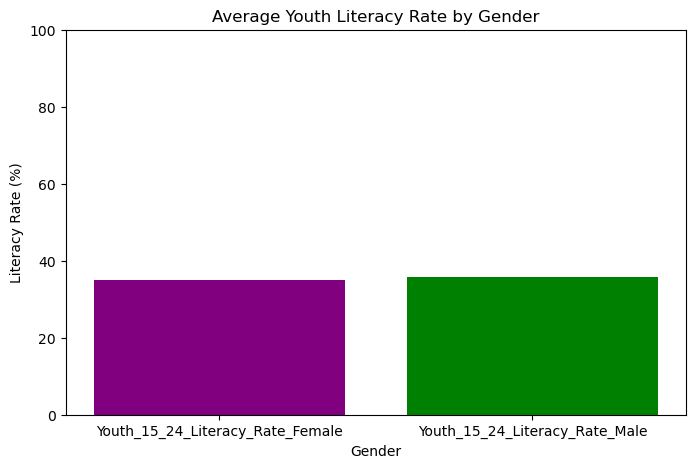

In [4]:
# Calculate averages for literacy rates
literacy_avg = data[['Youth_15_24_Literacy_Rate_Female', 'Youth_15_24_Literacy_Rate_Male']].mean()

plt.figure(figsize=(8, 5))
plt.bar(literacy_avg.index, literacy_avg.values, color=['purple', 'green'])
plt.title("Average Youth Literacy Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Literacy Rate (%)")
plt.ylim(0, 100)
plt.show()


In [5]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


3. World Map: Country Distribution

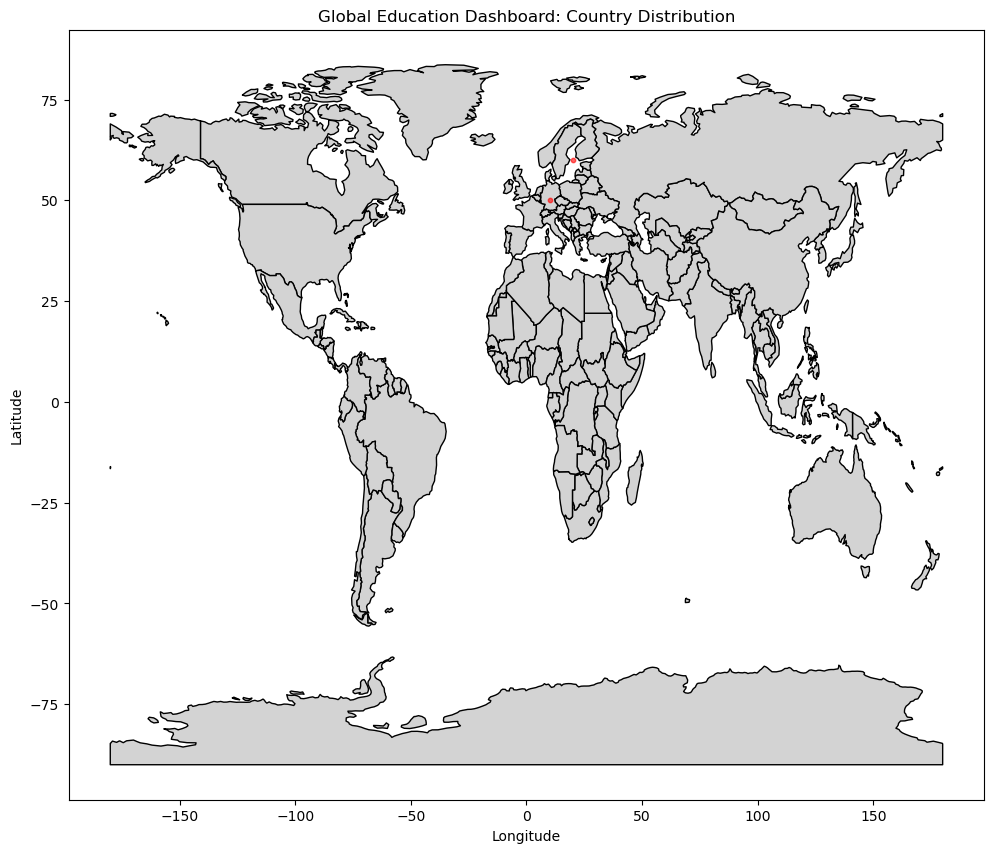

In [6]:
# Import necessary libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import zipfile
import io
import pandas as pd

# Download the Natural Earth low-resolution world map data
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
response = requests.get(url)

# Unzip the downloaded data
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall()

# Load the world map data into a GeoDataFrame
world = gpd.read_file("ne_110m_admin_0_countries.shp")  # Path to the downloaded shapefile

# Prepare your own data (this is just an example, replace with your actual data)
data = pd.DataFrame({
    'Country': ['Country1', 'Country2'],  # Replace with your country names
    'Longitude': [10, 20],                 # Replace with your actual longitudes
    'Latitude': [50, 60]                   # Replace with your actual latitudes
})

# Convert our data into a GeoDataFrame for latitude and longitude
geo_data = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']),
    crs="EPSG:4326"  # WGS 84 coordinate system
)

# Plot world map and overlay country points
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot points for each country based on latitude and longitude
geo_data.plot(ax=ax, color='red', markersize=10, alpha=0.6)

plt.title("Global Education Dashboard: Country Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


4. Additional Plots: Education Metrics

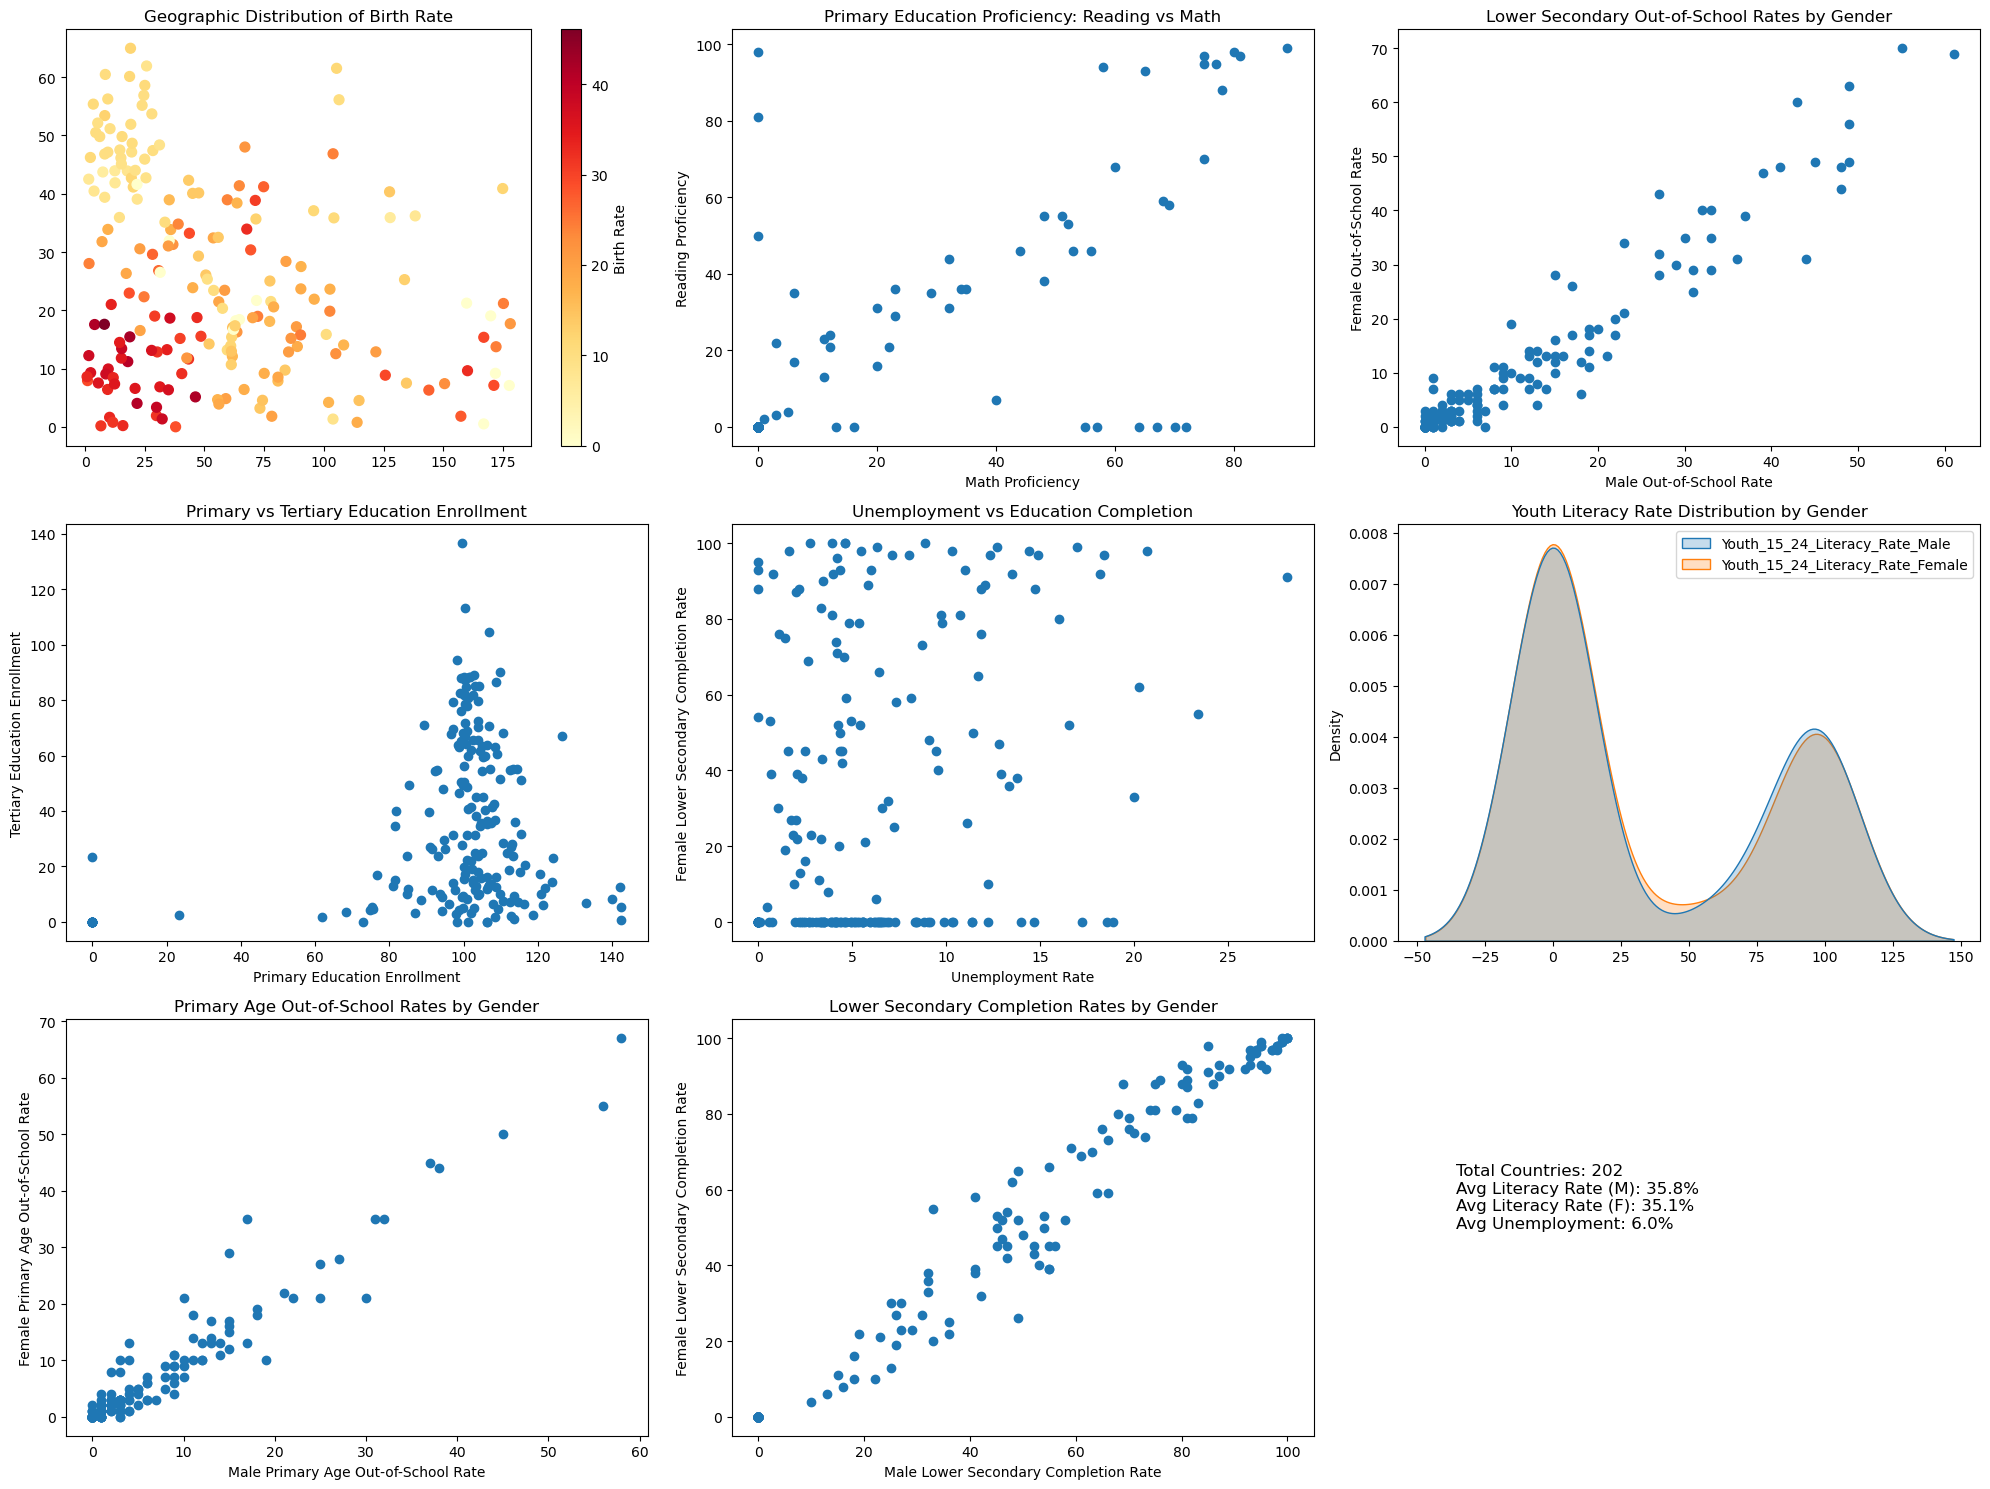

<Figure size 640x480 with 0 Axes>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('C:/Users/zubair/Desktop/MSC CS P2/ANUDIP/project dashboard/Global_Education_updated.csv')

# Set the style
# plt.style.use('seaborn')

# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 15))

# 1. World Map Scatter Plot
ax1 = plt.subplot(3, 3, 1)
plt.scatter(df['Longitude'], df['Latitude '], c=df['Birth_Rate'],
            cmap='YlOrRd', s=50)
plt.colorbar(label='Birth Rate')
plt.title('Geographic Distribution of Birth Rate')

# 2. Primary Education Proficiency Scatter
ax2 = plt.subplot(3, 3, 2)
plt.scatter(df['Primary_End_Proficiency_Math'],
            df['Primary_End_Proficiency_Reading'])
plt.xlabel('Math Proficiency')
plt.ylabel('Reading Proficiency')
plt.title('Primary Education Proficiency: Reading vs Math')

# 3. Secondary Education Out-of-School Rate
ax3 = plt.subplot(3, 3, 3)
plt.scatter(df['OOSR_Lower_Secondary_Age_Male'],
            df['OOSR_Lower_Secondary_Age_Female'])
plt.xlabel('Male Out-of-School Rate')
plt.ylabel('Female Out-of-School Rate')
plt.title('Lower Secondary Out-of-School Rates by Gender')

# 4. Education Enrollment Comparison
ax4 = plt.subplot(3, 3, 4)
plt.scatter(df['Gross_Primary_Education_Enrollment'],
            df['Gross_Tertiary_Education_Enrollment'])
plt.xlabel('Primary Education Enrollment')
plt.ylabel('Tertiary Education Enrollment')
plt.title('Primary vs Tertiary Education Enrollment')

# 5. Completion Rate vs Unemployment
ax5 = plt.subplot(3, 3, 5)
plt.scatter(df['Unemployment_Rate'],
            df['Completion_Rate_Lower_Secondary_Female'])
plt.xlabel('Unemployment Rate')
plt.ylabel('Female Lower Secondary Completion Rate')
plt.title('Unemployment vs Education Completion')

# 6. Literacy Rate Distribution
ax6 = plt.subplot(3, 3, 6)
sns.kdeplot(data=df[['Youth_15_24_Literacy_Rate_Male',
                     'Youth_15_24_Literacy_Rate_Female']], fill=True)
plt.title('Youth Literacy Rate Distribution by Gender')

# 7. Primary Age Out-of-School Comparison
ax7 = plt.subplot(3, 3, 7)
plt.scatter(df['OOSR_Primary_Age_Male'],
            df['OOSR_Primary_Age_Female'])
plt.xlabel('Male Primary Age Out-of-School Rate')
plt.ylabel('Female Primary Age Out-of-School Rate')
plt.title('Primary Age Out-of-School Rates by Gender')

# 8. Secondary Completion Rate Comparison
ax8 = plt.subplot(3, 3, 8)
plt.scatter(df['Completion_Rate_Lower_Secondary_Male'],
            df['Completion_Rate_Lower_Secondary_Female'])
plt.xlabel('Male Lower Secondary Completion Rate')
plt.ylabel('Female Lower Secondary Completion Rate')
plt.title('Lower Secondary Completion Rates by Gender')

# Add summary statistics
ax9 = plt.subplot(3, 3, 9)
summary_stats = [
    f"Total Countries: {len(df)}",
    f"Avg Literacy Rate (M): {df['Youth_15_24_Literacy_Rate_Male'].mean():.1f}%",
    f"Avg Literacy Rate (F): {df['Youth_15_24_Literacy_Rate_Female'].mean():.1f}%",
    f"Avg Unemployment: {df['Unemployment_Rate'].mean():.1f}%"
]
ax9.text(0.1, 0.5, '\n'.join(summary_stats), fontsize=12)
ax9.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

# Save the figure
plt.savefig('education_dashboard.png', dpi=300, bbox_inches='tight')

In [8]:
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('C:/Users/zubair/Desktop/MSC CS P2/ANUDIP/project dashboard/Global_Education_updated.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    object 
 1   Latitude                                 202 non-null    float64
 2   Longitude                                202 non-null    float64
 3   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 4   OOSR_Pre0Primary_Age_Female              202 non-null    int64  
 5   OOSR_Primary_Age_Male                    202 non-null    int64  
 6   OOSR_Primary_Age_Female                  202 non-null    int64  
 7   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 8   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 9   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 10  OOSR_Upper_Secondary_Age_Female          202 non-n

In [10]:
print("Sum of Unemployment Rate: ",data['Unemployment_Rate'].sum())

Sum of Unemployment Rate:  1212.0


In [11]:
print("Sum of Youth_15_24_Literacy_Rate_Female: ",data['Youth_15_24_Literacy_Rate_Female'].sum())

Sum of Youth_15_24_Literacy_Rate_Female:  7087


In [12]:
print("Sum of Youth_15_24_Literacy_Rate_Male: ",data['Youth_15_24_Literacy_Rate_Male'].sum())

Sum of Youth_15_24_Literacy_Rate_Male:  7232


In [13]:
print("Sum of Primary_End_Proficiency_Reading: ",data['Primary_End_Proficiency_Reading'].sum())

Sum of Primary_End_Proficiency_Reading:  2165


In [14]:
print("Sum of Primary_End_Proficiency_Math: ",data['Primary_End_Proficiency_Math'].sum())

Sum of Primary_End_Proficiency_Math:  2096


In [15]:
x = data['Lower_Secondary_End_Proficiency_Math']
y = data['Lower_Secondary_End_Proficiency_Reading'].sum()
print(x)
print(y)

0      58
1      19
2       0
3       0
4       0
       ..
197     8
198    75
199     0
200    49
201    81
Name: Lower_Secondary_End_Proficiency_Math, Length: 202, dtype: int64
5209


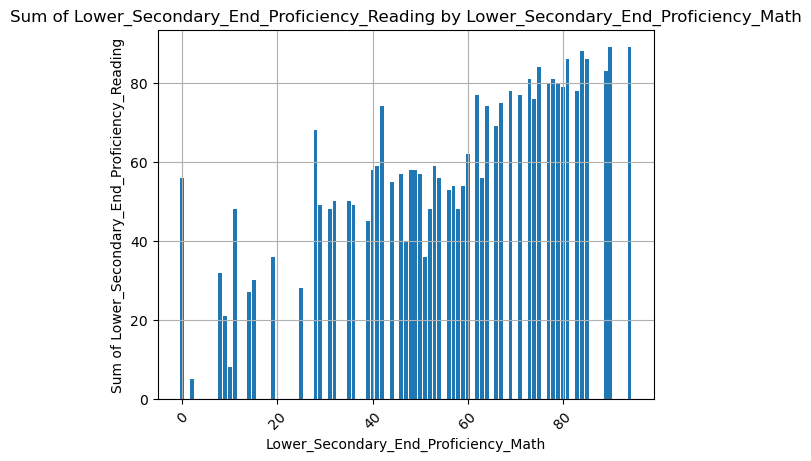

In [16]:
plt.bar(data['Lower_Secondary_End_Proficiency_Math'], data['Lower_Secondary_End_Proficiency_Reading'])

# Set the chart title and axis labels
plt.title('Sum of Lower_Secondary_End_Proficiency_Reading by Lower_Secondary_End_Proficiency_Math')
plt.xlabel('Lower_Secondary_End_Proficiency_Math')
plt.ylabel('Sum of Lower_Secondary_End_Proficiency_Reading')

# Customize the appearance of the chart (optional)
plt.grid(True)  # Add grid lines
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the chart
plt.show()

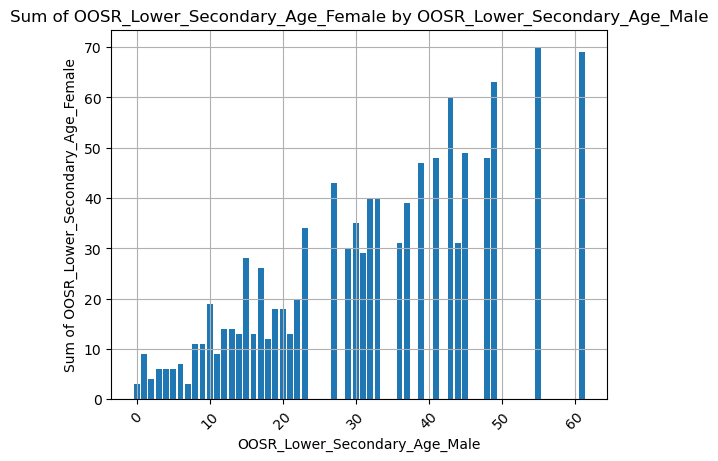

In [17]:
plt.bar(data['OOSR_Lower_Secondary_Age_Male'], data['OOSR_Lower_Secondary_Age_Female'])

# Set the chart title and axis labels
plt.title('Sum of OOSR_Lower_Secondary_Age_Female by OOSR_Lower_Secondary_Age_Male')
plt.xlabel('OOSR_Lower_Secondary_Age_Male')
plt.ylabel('Sum of OOSR_Lower_Secondary_Age_Female')

# Customize the appearance of the chart (optional)
plt.grid(True)  # Add grid lines
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the chart
plt.show()

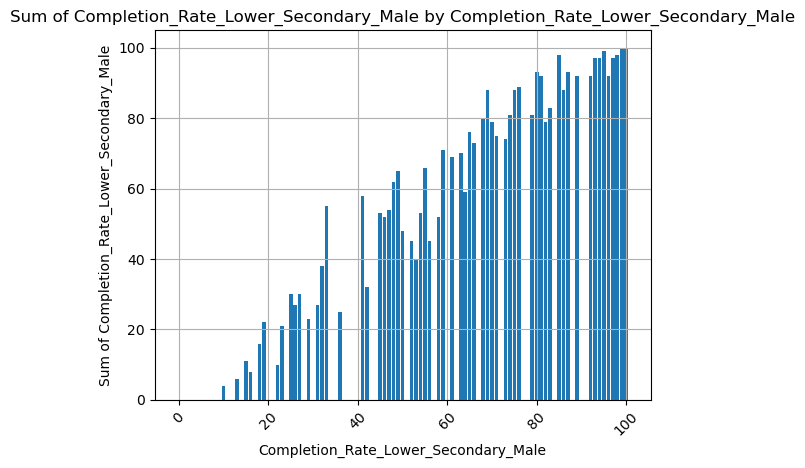

In [18]:
plt.bar(data['Completion_Rate_Lower_Secondary_Male'], data['Completion_Rate_Lower_Secondary_Female'])
# Set the chart title and axis labels
plt.title('Sum of Completion_Rate_Lower_Secondary_Male by Completion_Rate_Lower_Secondary_Male')
plt.xlabel('Completion_Rate_Lower_Secondary_Male')
plt.ylabel('Sum of Completion_Rate_Lower_Secondary_Male')

# Customize the appearance of the chart (optional)
plt.grid(True)  # Add grid lines
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the chart
plt.show()

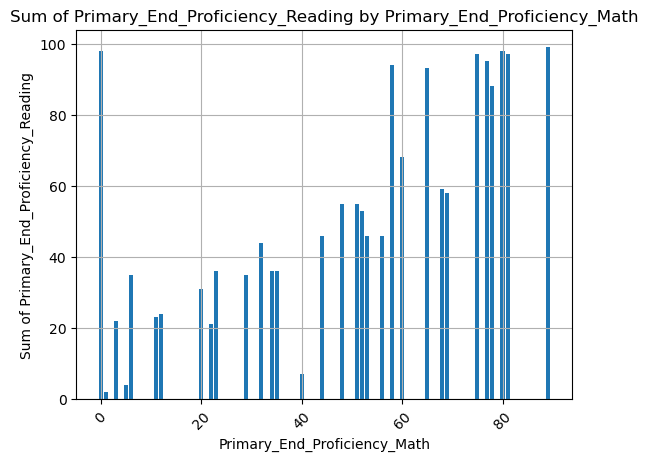

In [19]:


plt.bar(data['Primary_End_Proficiency_Math'], data['Primary_End_Proficiency_Reading'])
# Set the chart title and axis labels
plt.title('Sum of Primary_End_Proficiency_Reading by Primary_End_Proficiency_Math')
plt.xlabel('Primary_End_Proficiency_Math')
plt.ylabel('Sum of Primary_End_Proficiency_Reading')

# Customize the appearance of the chart (optional)
plt.grid(True)  # Add grid lines
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the chart
plt.show()

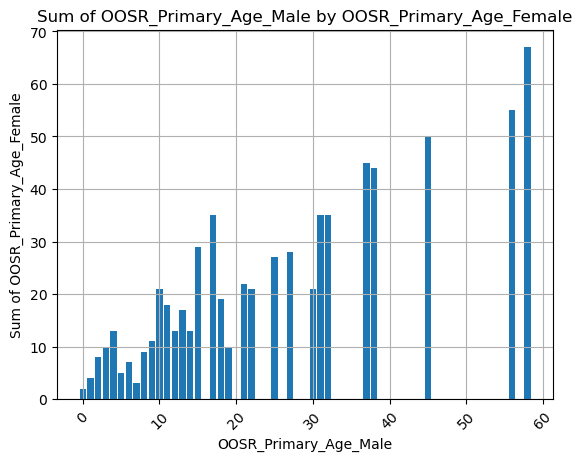

In [20]:


plt.bar(data['OOSR_Primary_Age_Male'], data['OOSR_Primary_Age_Female'])
# Set the chart title and axis labels
plt.title('Sum of OOSR_Primary_Age_Male by OOSR_Primary_Age_Female')
plt.xlabel('OOSR_Primary_Age_Male')
plt.ylabel('Sum of OOSR_Primary_Age_Female')

# Customize the appearance of the chart (optional)
plt.grid(True)  # Add grid lines
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the chart
plt.show()

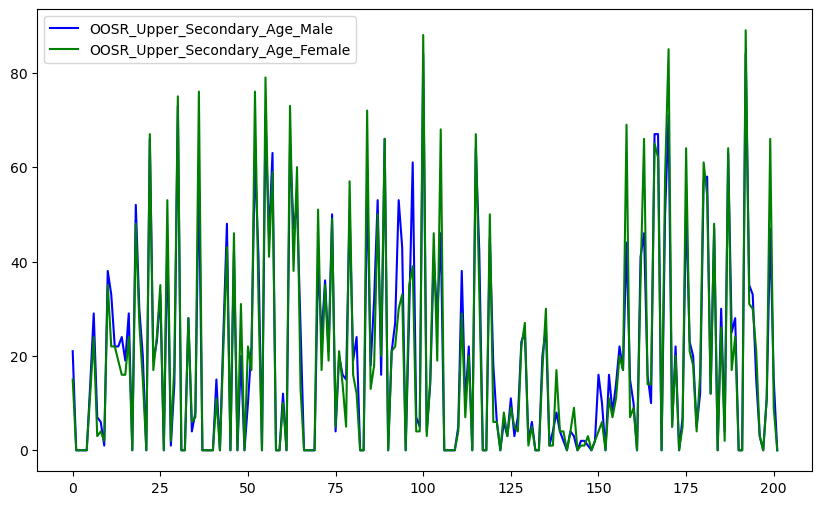

In [21]:
plt.figure(figsize=(10, 6))
# plt.bar(data['OOSR_Upper_Secondary_Age_Male'], data['OOSR_Upper_Secondary_Age_Female'])
plt.plot(data['OOSR_Upper_Secondary_Age_Male'], label='OOSR_Upper_Secondary_Age_Male', color='blue' )
plt.plot(data['OOSR_Upper_Secondary_Age_Female'], label='OOSR_Upper_Secondary_Age_Female', color='green')

# plt.axhline(data['OOSR_Upper_Secondary_Age_Male'].mean(), color='red', linestyle='--', label='Average Sales')
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.title('Sales Trend with Average')
plt.legend()
plt.show()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    object 
 1   Latitude                                 202 non-null    float64
 2   Longitude                                202 non-null    float64
 3   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 4   OOSR_Pre0Primary_Age_Female              202 non-null    int64  
 5   OOSR_Primary_Age_Male                    202 non-null    int64  
 6   OOSR_Primary_Age_Female                  202 non-null    int64  
 7   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 8   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 9   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 10  OOSR_Upper_Secondary_Age_Female          202 non-n

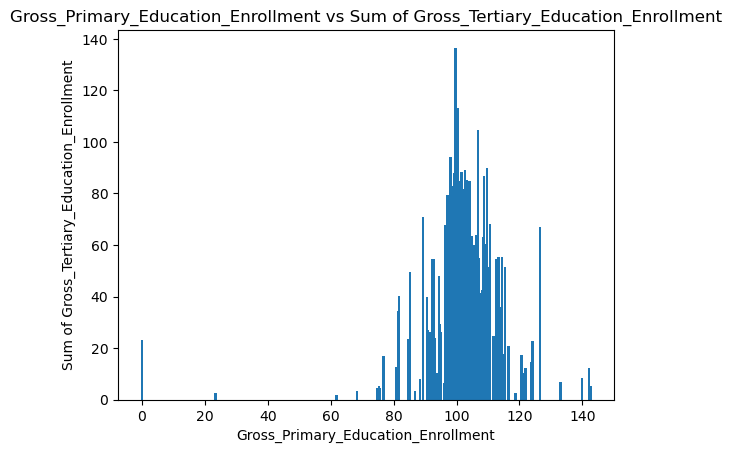

In [23]:
plt.bar(data['Gross_Primary_Education_Enrollment'],data['Gross_Tertiary_Education_Enrollment'])
plt.xlabel('Gross_Primary_Education_Enrollment')
plt.ylabel('Sum of Gross_Tertiary_Education_Enrollment')
plt.title('Gross_Primary_Education_Enrollment vs Sum of Gross_Tertiary_Education_Enrollment')
plt.show()

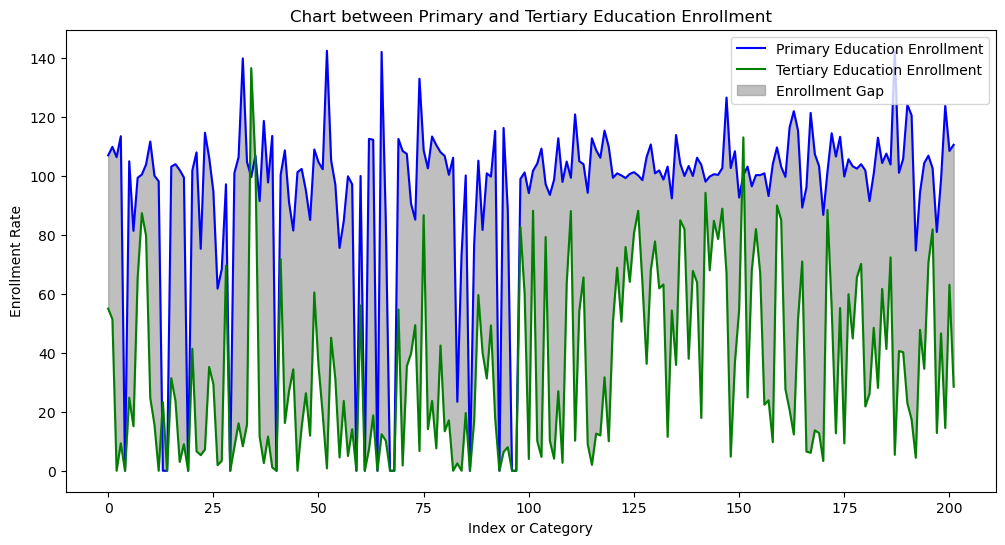

In [24]:
x = range(len(data))  # assuming data has sequential index

# Extract the two columns
y1 = data['Gross_Primary_Education_Enrollment']
y2 = data['Gross_Tertiary_Education_Enrollment']

plt.figure(figsize=(12, 6))

# Plot both lines for reference
plt.plot(x, y1, color='blue', label='Primary Education Enrollment')
plt.plot(x, y2, color='green', label='Tertiary Education Enrollment')

# Fill the area between the two lines to create a ribbon effect
plt.fill_between(x, y1, y2, color='gray', alpha=0.5, label='Enrollment Gap')

# Customize the chart
plt.xlabel("Index or Category")
plt.ylabel("Enrollment Rate")
plt.title("Chart between Primary and Tertiary Education Enrollment")
plt.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


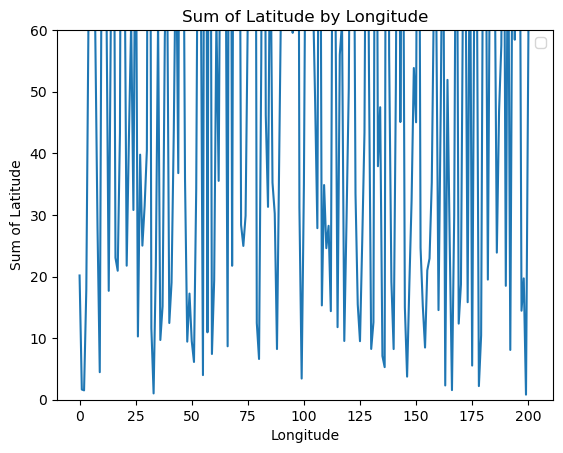

In [25]:
# plt.stackplot(data['Longitude'],data['Latitude '])
plt.plot(data['Longitude'])
plt.plot(data['Latitude '].sum())
plt.ylim(0,60)
plt.xlabel('Longitude')
plt.ylabel('Sum of Latitude')
plt.title('Sum of Latitude by Longitude')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


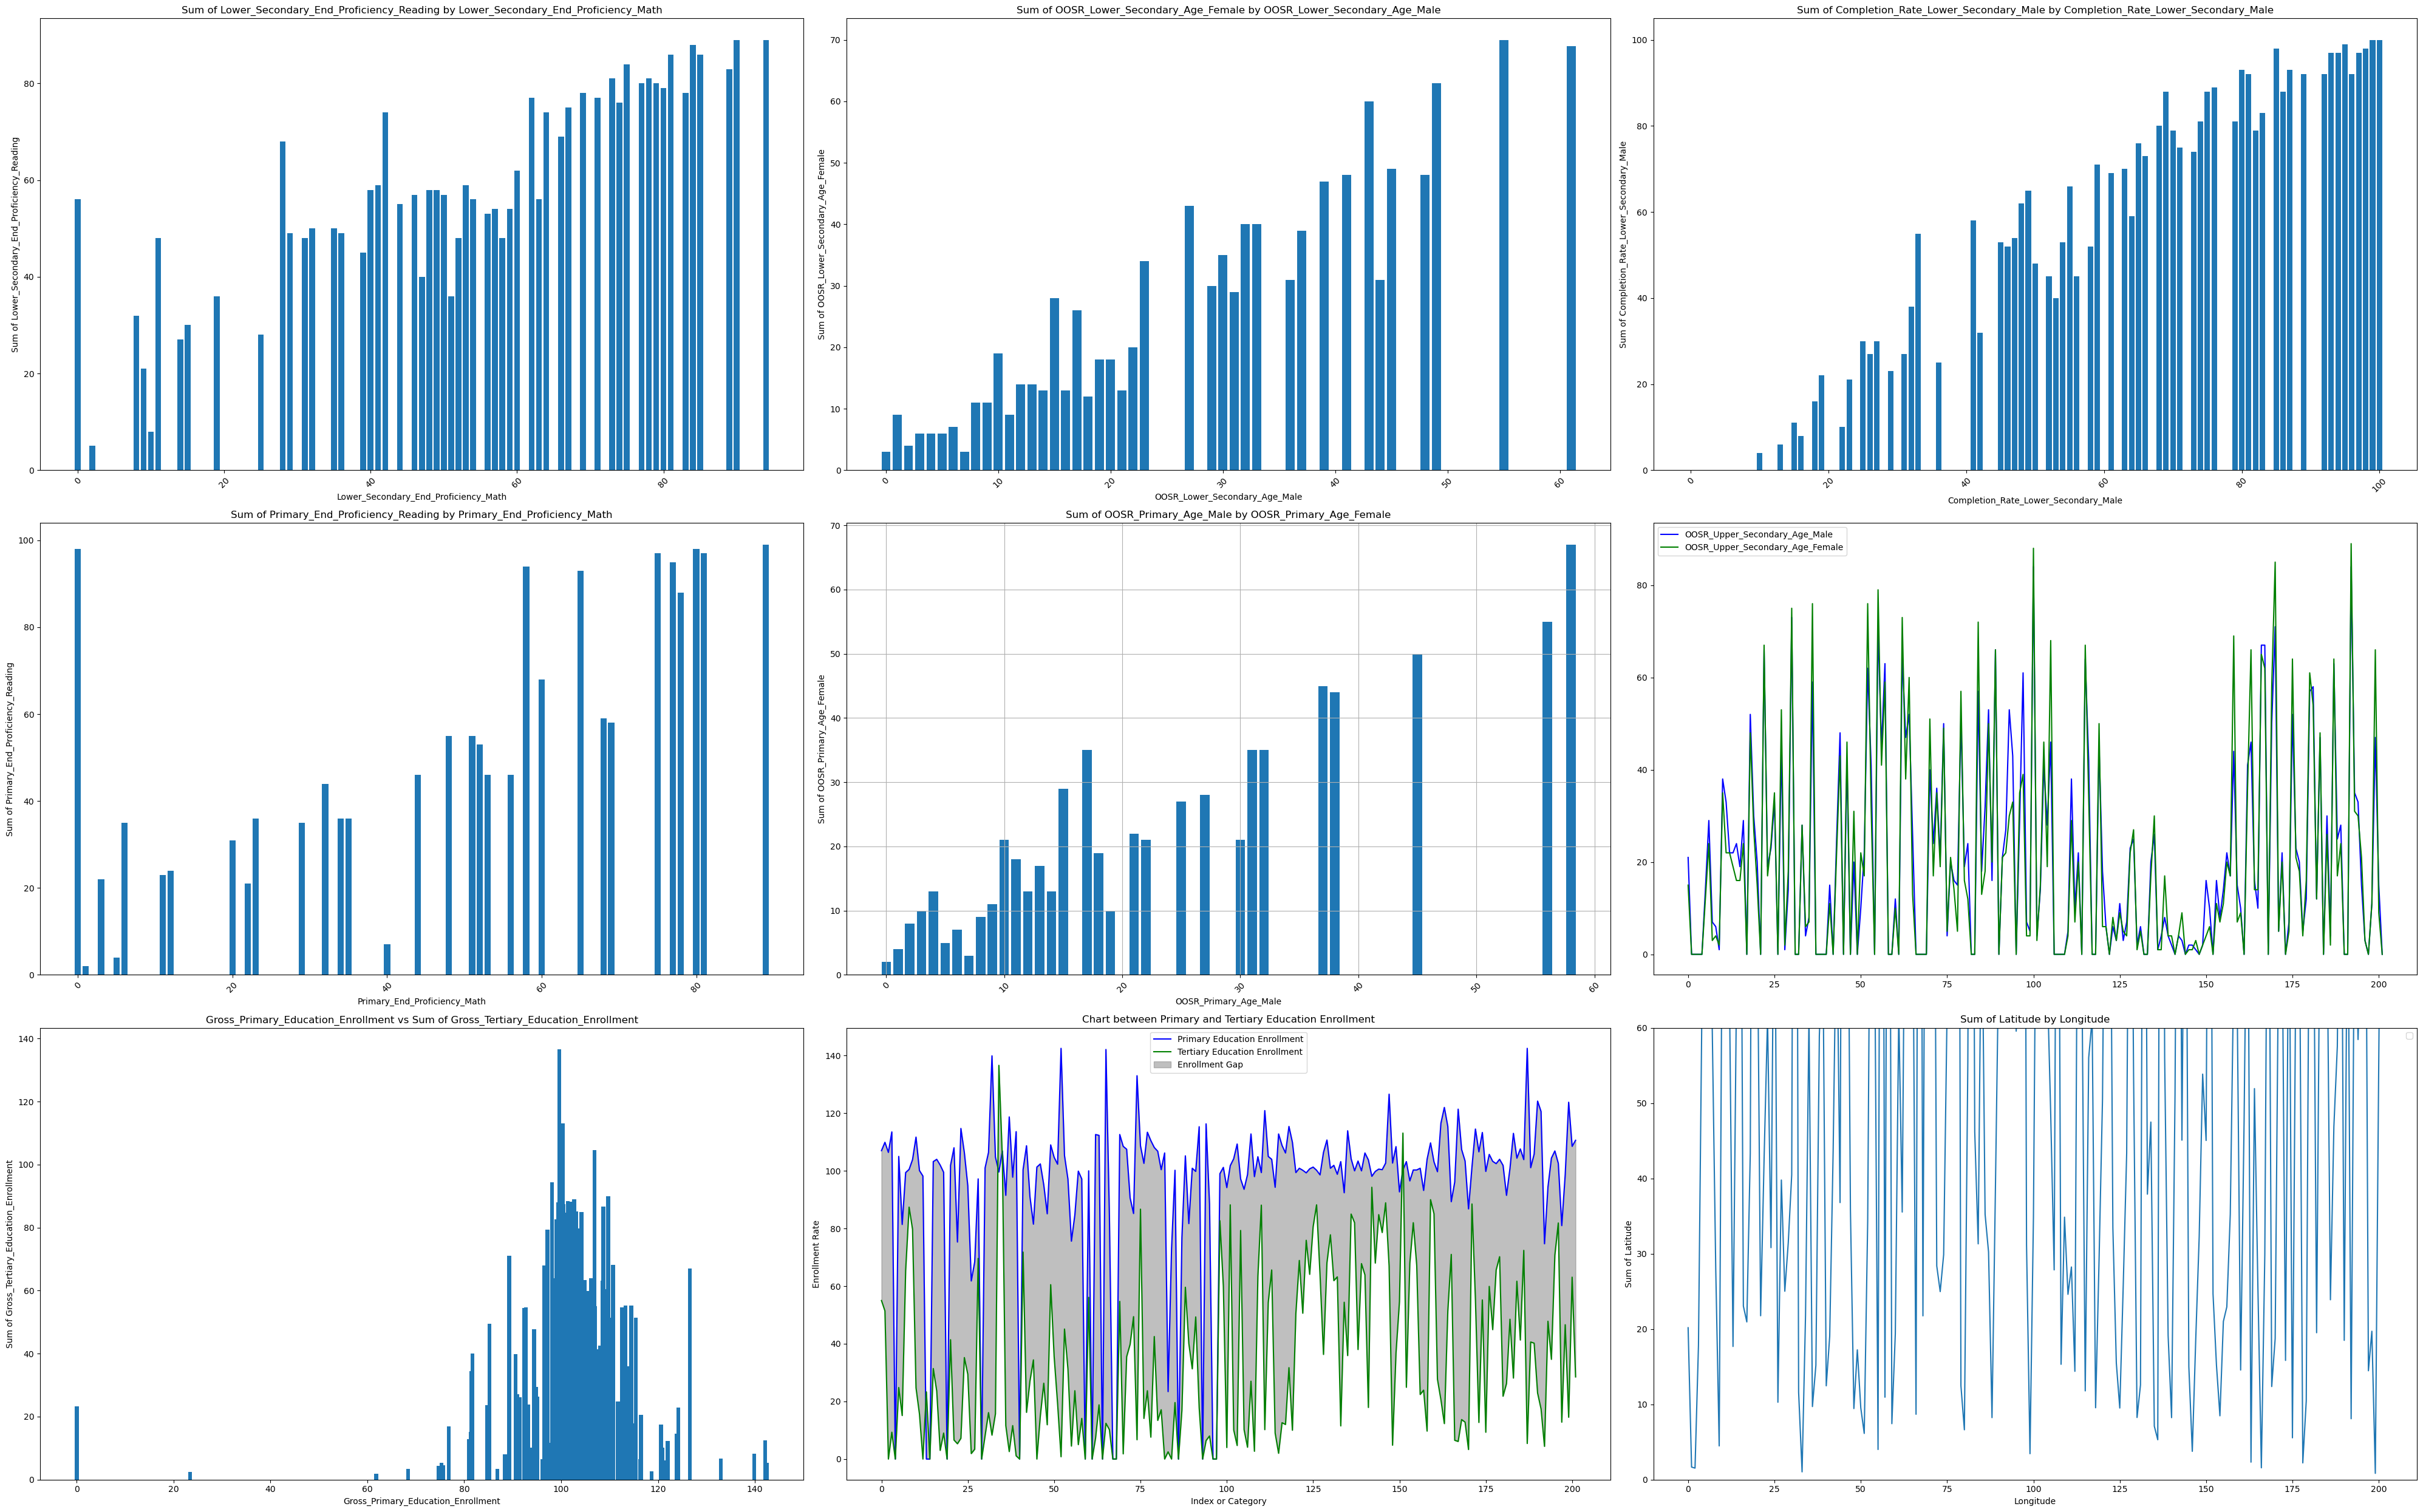

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('C:/Users/zubair/Desktop/MSC CS P2/ANUDIP/project dashboard/Global_Education_updated.csv')

# Set the style
# plt.style.use('seaborn')

# Create a figure with multiple subplots
fig = plt.figure(figsize=(40, 25))

# 1. World Map Scatter Plot
ax1 = plt.subplot(3, 3, 1)
plt.bar(data['Lower_Secondary_End_Proficiency_Math'], data['Lower_Secondary_End_Proficiency_Reading'])
plt.title('Sum of Lower_Secondary_End_Proficiency_Reading by Lower_Secondary_End_Proficiency_Math')
plt.xlabel('Lower_Secondary_End_Proficiency_Math')
plt.ylabel('Sum of Lower_Secondary_End_Proficiency_Reading')
plt.xticks(rotation=45)

# 2. Primary Education Proficiency Scatter
ax2 = plt.subplot(3, 3, 2)
plt.bar(data['OOSR_Lower_Secondary_Age_Male'], data['OOSR_Lower_Secondary_Age_Female'])
plt.title('Sum of OOSR_Lower_Secondary_Age_Female by OOSR_Lower_Secondary_Age_Male')
plt.xlabel('OOSR_Lower_Secondary_Age_Male')
plt.ylabel('Sum of OOSR_Lower_Secondary_Age_Female')
plt.xticks(rotation=45)

# 3. Secondary Education Out-of-School Rate
ax3 = plt.subplot(3, 3, 3)
plt.bar(data['Completion_Rate_Lower_Secondary_Male'], data['Completion_Rate_Lower_Secondary_Female'])
# Set the chart title and axis labels
plt.title('Sum of Completion_Rate_Lower_Secondary_Male by Completion_Rate_Lower_Secondary_Male')
plt.xlabel('Completion_Rate_Lower_Secondary_Male')
plt.ylabel('Sum of Completion_Rate_Lower_Secondary_Male')
plt.xticks(rotation=45)

# 4. Education Enrollment Comparison
ax4 = plt.subplot(3, 3, 4)
plt.bar(data['Primary_End_Proficiency_Math'], data['Primary_End_Proficiency_Reading'])
plt.title('Sum of Primary_End_Proficiency_Reading by Primary_End_Proficiency_Math')
plt.xlabel('Primary_End_Proficiency_Math')
plt.ylabel('Sum of Primary_End_Proficiency_Reading')
plt.xticks(rotation=45)

# 5. Completion Rate vs Unemployment
ax5 = plt.subplot(3, 3, 5)
plt.bar(data['OOSR_Primary_Age_Male'], data['OOSR_Primary_Age_Female'])
plt.title('Sum of OOSR_Primary_Age_Male by OOSR_Primary_Age_Female')
plt.xlabel('OOSR_Primary_Age_Male')
plt.ylabel('Sum of OOSR_Primary_Age_Female')
plt.grid(True)
plt.xticks(rotation=45)

# 6. Literacy Rate Distribution
ax6 = plt.subplot(3, 3, 6)
plt.plot(data['OOSR_Upper_Secondary_Age_Male'], label='OOSR_Upper_Secondary_Age_Male', color='blue' )
plt.plot(data['OOSR_Upper_Secondary_Age_Female'], label='OOSR_Upper_Secondary_Age_Female', color='green')
plt.legend()

# 7. Primary Age Out-of-School Comparison
ax7 = plt.subplot(3, 3, 7)
plt.bar(data['Gross_Primary_Education_Enrollment'],data['Gross_Tertiary_Education_Enrollment'])
plt.xlabel('Gross_Primary_Education_Enrollment')
plt.ylabel('Sum of Gross_Tertiary_Education_Enrollment')
plt.title('Gross_Primary_Education_Enrollment vs Sum of Gross_Tertiary_Education_Enrollment') # assuming data has sequential index

# 8. Secondary Completion Rate Comparison
ax8 = plt.subplot(3, 3, 8)
y1 = data['Gross_Primary_Education_Enrollment']
y2 = data['Gross_Tertiary_Education_Enrollment']
plt.plot(x, y1, color='blue', label='Primary Education Enrollment')
plt.plot(x, y2, color='green', label='Tertiary Education Enrollment')
plt.fill_between(x, y1, y2, color='gray', alpha=0.5, label='Enrollment Gap')
plt.xlabel("Index or Category")
plt.ylabel("Enrollment Rate")
plt.title("Chart between Primary and Tertiary Education Enrollment")
plt.legend()


# Add summary statistics
ax9 = plt.subplot(3, 3, 9)
plt.plot(data['Longitude'])
plt.plot(data['Latitude '].sum())
plt.ylim(0,60)
plt.xlabel('Longitude')
plt.ylabel('Sum of Latitude')
plt.title('Sum of Latitude by Longitude')
plt.legend()
# ax9.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

# Save the figure
# plt.savefig('education_dashboard.png', dpi=300, bbox_inches='tight')

### **Conclusion**

Based on the analysis of global education data, the following insights were derived:  

1. **Correlation in Proficiency:**  
   - A strong positive correlation exists between primary students' proficiency in Math and Reading. This indicates that improvement in one area often corresponds to improvement in the other.  

2. **Youth Literacy Rates:**  
   - Globally, male youth literacy rates (ages 15–24) are slightly higher than female literacy rates, suggesting a continued gender gap in literacy despite progress in many regions.  

3. **Education Enrollment Trends:**  
   - While primary education enrollment rates are relatively high, tertiary education enrollment lags significantly, highlighting disparities in access to higher education.  

4. **Geographic Disparities:**  
   - Geographic visualizations reveal significant regional disparities in education metrics, with some regions showing higher completion rates and literacy rates than others. This emphasizes the need for targeted interventions in underserved areas.  

5. **Gender Equality in Education:**  
   - Analysis of lower secondary education completion rates shows that, in many countries, gender equality is improving, but certain regions still face challenges in bridging the gap.  

These insights underline the importance of policies aimed at improving literacy, increasing access to tertiary education, and ensuring equitable education opportunities across genders and regions.